In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [3]:
mnist = fetch_openml('mnist_784', parser='auto')
X, y = mnist.data[:12000], mnist.target[:12000].astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=10000, test_size=2000, stratify=y, random_state=42
)

In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#linear svm
linear_svm = LinearSVC(dual=False, max_iter=5000)
start_time = time.time()
linear_svm.fit(X_train_scaled, y_train)
linear_train_time = time.time() - start_time

In [7]:
y_pred_linear = linear_svm.predict(X_test_scaled)
linear_accuracy = accuracy_score(y_test, y_pred_linear)


print(f"Dokładność modelu Linear SVM: {linear_accuracy:.4f}")
print(f"Czas trenowania modelu Linear SVM: {linear_train_time:.4f}")

Dokładność modelu Linear SVM: 0.9065
Czas trenowania modelu Linear SVM: 3.5238


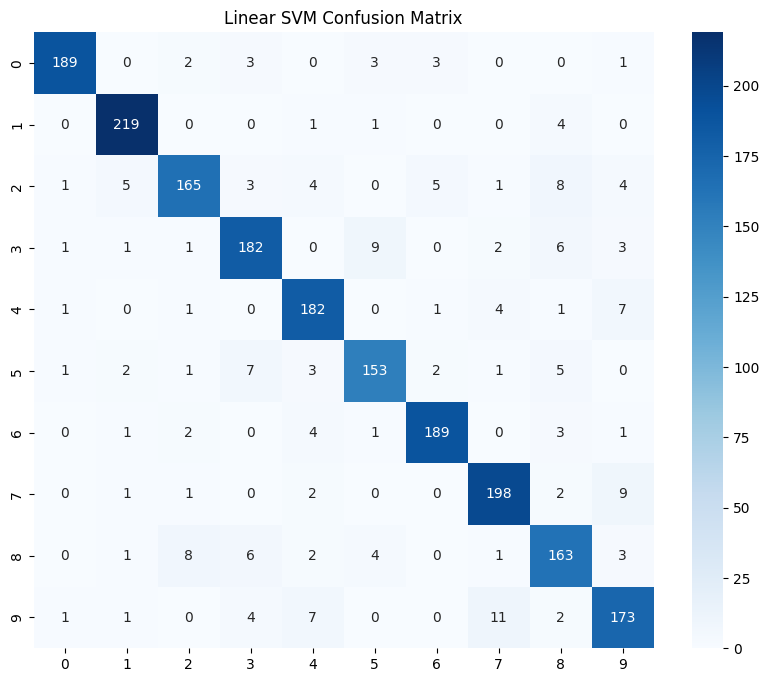

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues')
plt.title('Linear SVM Confusion Matrix')
plt.show()

macierz pomyłek - dla zbioru 1 przewidywanych ile razy wyznaczyła ten sam element, a ile razy się pomyliło
duże wartości na przekątnej - zbiór względnie dobrze sklasyfikowany

In [9]:
#rbf
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
start_time = time.time()
rbf_svm.fit(X_train_scaled, y_train)
rbf_train_time = time.time() - start_time

In [10]:
y_pred_rbf = rbf_svm.predict(X_test_scaled)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)


print(f"Dokładność modelu RFB SVM: {rbf_accuracy:.4f}")
print(f"Czas trenowania modelu RFB SVM: {rbf_train_time:.4f}")

Dokładność modelu RFB SVM: 0.9695
Czas trenowania modelu RFB SVM: 11.1896


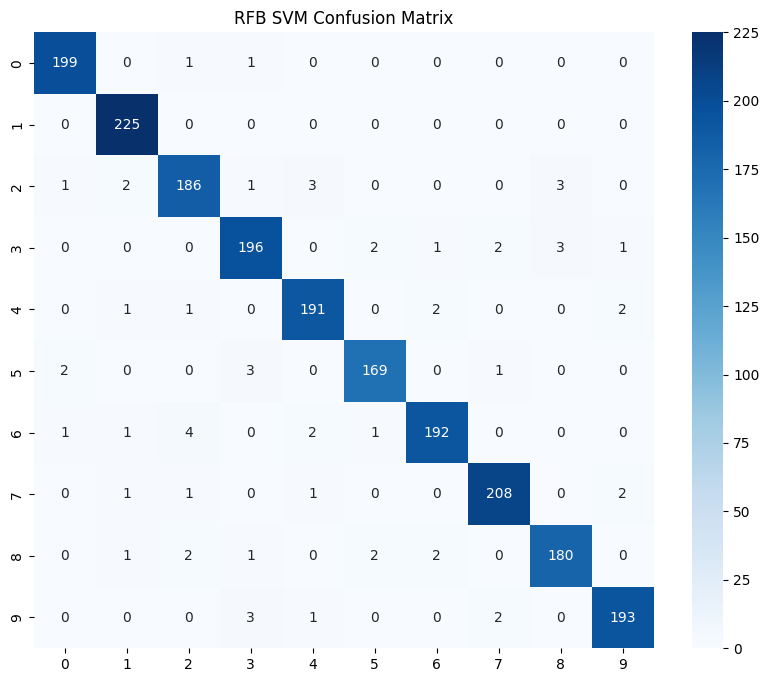

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Blues')
plt.title('RFB SVM Confusion Matrix')
plt.show()


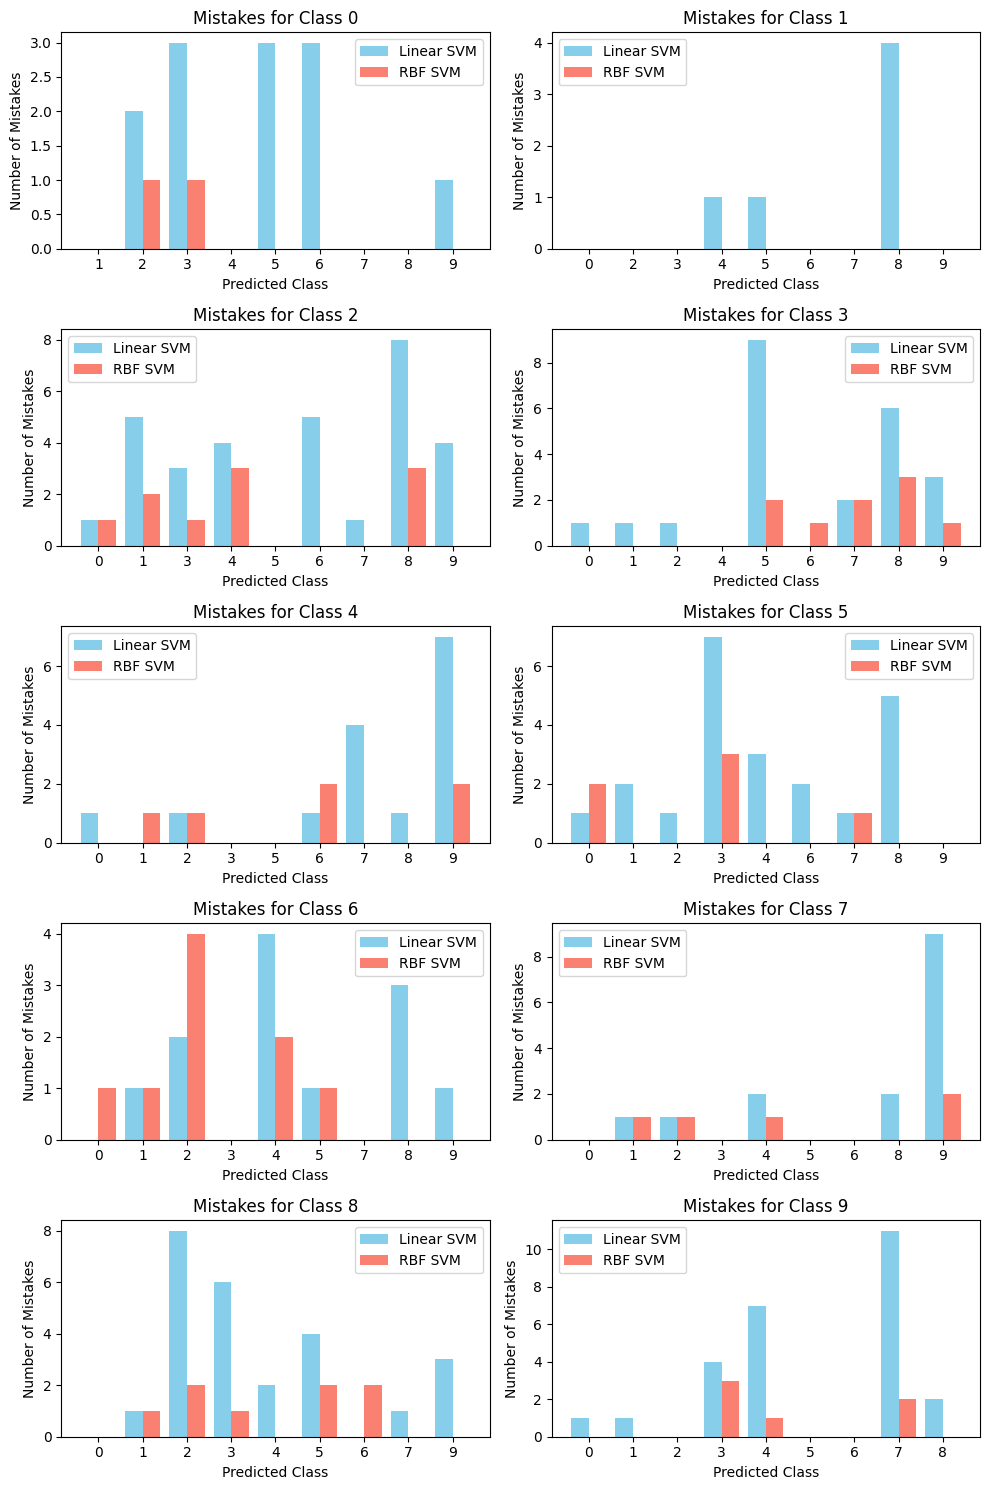

In [34]:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

num_classes = 10
rows = 5
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(10, 3*rows))

axes = axes.ravel()

for i in range(num_classes):
    linear_mistakes = np.delete(conf_matrix_linear[i], i)
    rbf_mistakes = np.delete(conf_matrix_rbf[i], i)

    axes[i].bar(np.arange(9) - 0.2, linear_mistakes, 0.4, label="Linear SVM", color='skyblue')
    axes[i].bar(np.arange(9) + 0.2, rbf_mistakes, 0.4, label="RBF SVM", color='salmon')

    axes[i].set_xlabel('Predicted Class')
    axes[i].set_ylabel('Number of Mistakes')
    axes[i].set_title(f'Mistakes for Class {i}')
    axes[i].set_xticks(np.arange(9))
    axes[i].set_xticklabels([str(j) for j in range(10) if j != i])
    axes[i].set_ylim(bottom=0)
    axes[i].legend()

plt.tight_layout()
plt.show()

Odpowiedz na pytania: \\
1. Czy skalowanie pomaga w tym przypadku w treningu? \\
2. Dla czego RBF działa wolniej od liniowego SVM? \\
3. Ile wektorów wykorzystał każdy model?

# **1. Porównanie trenowania z skalowaniem i bez**

In [ ]:
#linear not scaled svm
linear_svm = LinearSVC(dual=False, max_iter=5000)
start_time = time.time()
linear_svm.fit(X_train, y_train)
linear_train_time = time.time() - start_time

In [ ]:
y_pred_linear = linear_svm.predict(X_test_scaled)
linear_accuracy = accuracy_score(y_test, y_pred_linear)

Dokładność modelu Linear SVM: 0.5625
Czas trenowania modelu Linear SVM: 218.2871


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
print(f"Dokładność modelu Linear SVM: {linear_accuracy:.4f}")
print(f"Czas trenowania modelu Linear SVM: {linear_train_time:.4f}")

Dokładność modelu Linear SVM: 0.5625
Czas trenowania modelu Linear SVM: 218.2871


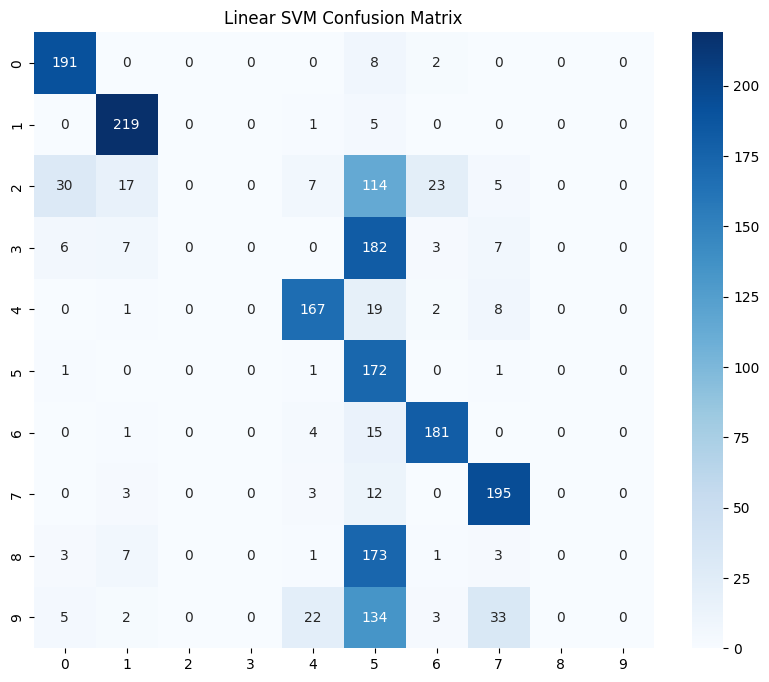

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cmap='Blues')
plt.title('Linear SVM Confusion Matrix')
plt.show()

Dokładność po użyciu skalowania widocznie podskakuje, ze względu na znormalizowane cechy w danych.
Prędkość również dużo się różni z widoczną przewagą dla implementacji z użytym skalowaniem.

# **2. Dla czego RBF działa wolniej od liniowego SVM?**

RFB osiąga wolniejsze czasy, ze względu na sposób przetwarzania danych i
wyznaczania granic decyzyjnych.
Liniowy algorytm można rozwiązać przy pomocy dużego ukladu równań, natomiast w przypadku algorytmu RFB Każdy punkt ma realny wplyw na granice decyzyjne i każda próbka musi być porównana z wszystkimi innymi, przez co wymagane jest trzymanie w pamięci całej macierzy odległości

# **3. Ile wektorów wykorzystał każdy model?**

In [ ]:
svc = SVC(kernel='linear', random_state=42, max_iter=5000)
svc.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='linear', max_iter=5000, random_state=42)

In [ ]:

print(f"Number of support vectors for Linear SVC: {svc.n_support_.shape[0]}")
print(f"Number of support vectors for RBF SVM: {rbf_svm.support_.shape[0]}")

Number of support vectors for SVC: 10
Number of support vectors for RBF SVM: 3779


Linear SVM posiada 10 wektorów nośnych, natomiast w przypadku implementacji RFB jest ich 3779, co może wskazywać na to że jest to dużo bardziej skomplikowany kształt granicy decyzyjnej